In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path
import community.community_louvain as cl

In [ ]:
from nilearn import datasets
from nilearn import plotting

aal = datasets.fetch_atlas_aal()

In [ ]:
!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

replace DataSujetos/N1_suj8.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
filenames_N1 = list(Path('DataSujetos').glob('N1_*.csv'))
filenames_N2 = list(Path('DataSujetos').glob('N2_*.csv'))
filenames_N3 = list(Path('DataSujetos').glob('N3_*.csv'))
filenames_W  = list(Path('DataSujetos').glob('W_*.csv'))

In [ ]:
def binarize(matrix, density):
    
    n = matrix.shape[0]
    matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(matrix.values[tril_idx].flatten(),reverse=True)
    
    idx = int(density*max_links)
    threshold = sorted_correlations[idx]
    
    return matrix>=threshold

In [ ]:
def avg_adj_matrix(filenames,density):
    n = len(filenames)
    acum = np.zeros((116,116))
    for filename in filenames:
      acum += binarize(pd.read_csv(filename, header=None),density)
      
        
    return nx.from_pandas_adjacency(acum/n)

In [ ]:
density = 0.075
avg_N1 = avg_adj_matrix(filenames_N1,density)
avg_N2 = avg_adj_matrix(filenames_N2,density)
avg_N3 = avg_adj_matrix(filenames_N3,density)
avg_W  = avg_adj_matrix(filenames_W,density)

In [ ]:
partition_W  = cl.best_partition(avg_W, random_state = 767)
partition_N1 = cl.best_partition(avg_N1, random_state = 767)
partition_N2 = cl.best_partition(avg_N2, random_state = 767)
partition_N3 = cl.best_partition(avg_N3, random_state = 767)

In [ ]:
def color_coded_adyacency_matrix(community_dict):
  A = np.zeros((116,116))
  for i in range(0,116):
    for j in range(0,116):
      if (community_dict[i] != community_dict[j]):
        A[i,j] = 1
      elif ((community_dict[i] == community_dict[j]) & (i != j)):
        A[i,j] = community_dict[i] + 2
  return A

In [ ]:
color_coded_adyacency_matrix(partition_W)

array([[0., 6., 1., ..., 1., 1., 1.],
       [6., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 4., 4.],
       [1., 1., 1., ..., 4., 0., 4.],
       [1., 1., 1., ..., 4., 4., 0.]])

In [ ]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=aal['maps'])

In [ ]:
np.unique(list(partition_N2.values()))

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow'}
cmap = mpl.colors.ListedColormap(["grey","red", "blue", "green", "orange","yellow","magenta","cyan"])

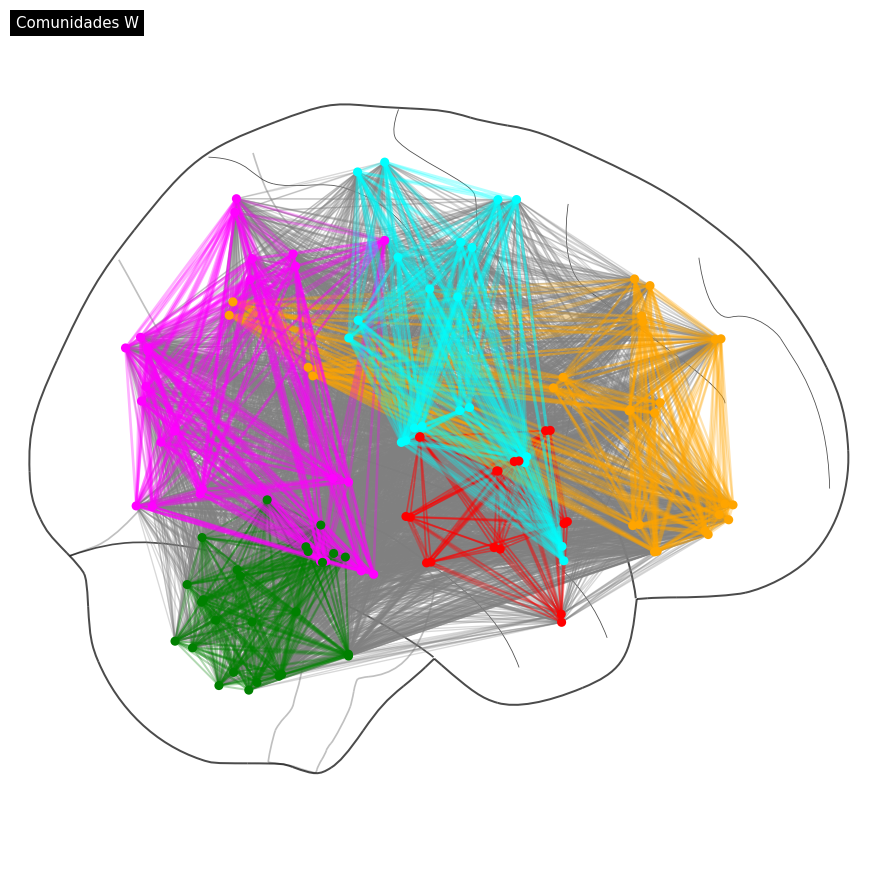

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red", "blue", "green", "orange","yellow","magenta","cyan"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in partition_W.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(partition_W), coordinates,
                         title='Comunidades W',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 6,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

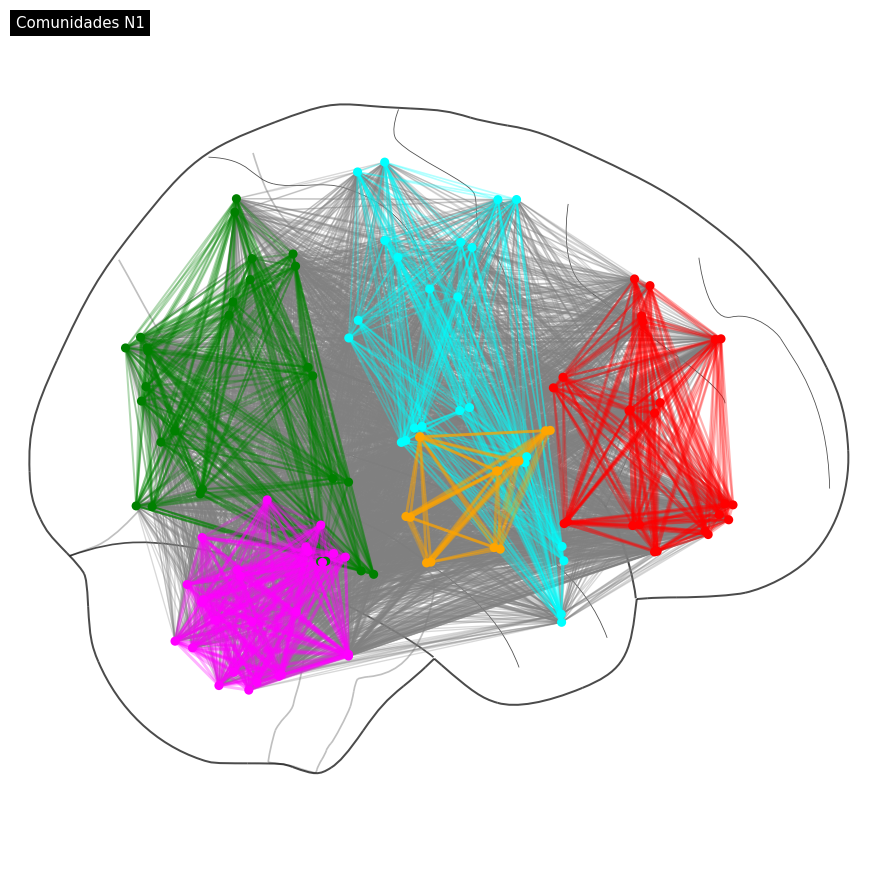

In [ ]:
color = {0:'cyan',1:'green',2:'red',3:'orange',4:'magenta',5:'blue',6:'yellow'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","cyan", "blue", "green", "red","yellow","orange","magenta"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in partition_N1.items()]
figN1 = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(partition_N1), coordinates,
                         title='Comunidades N1',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 6,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figN1);

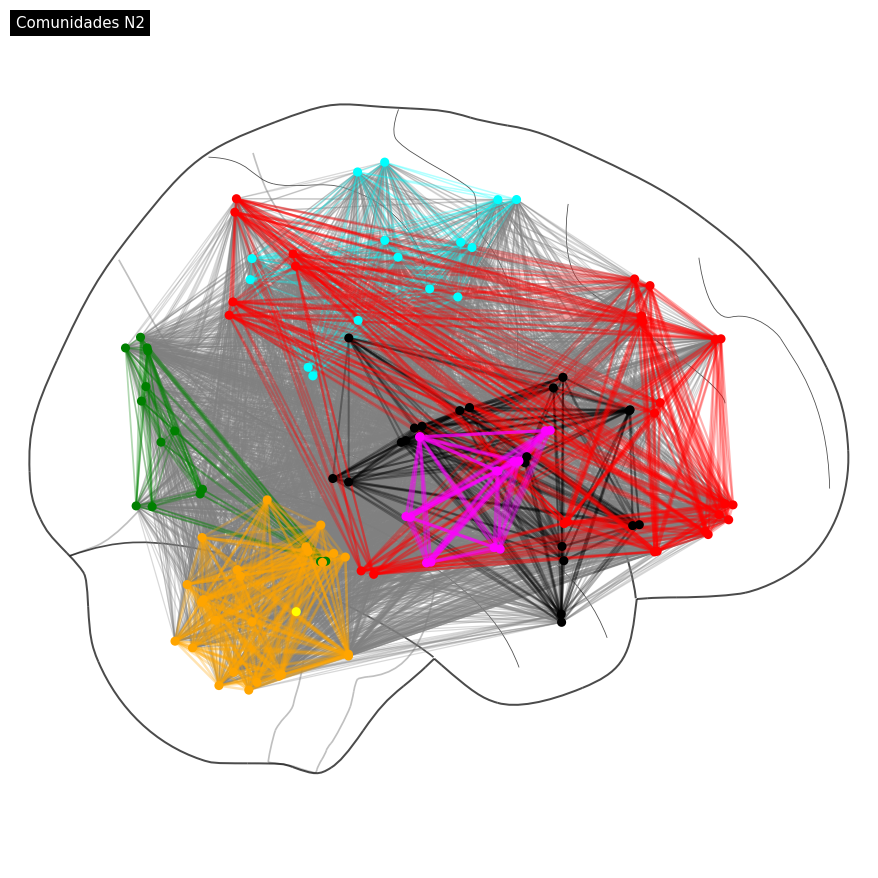

In [ ]:
color = {0:'cyan',1:'green',2:'black',3:'red',4:'orange',5:'yellow',6:'magenta'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","cyan", "green", "black", "red","orange","magenta","magenta"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in partition_N2.items()]
figN2 = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(partition_N2), coordinates,
                         title='Comunidades N2',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 8,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figN2);

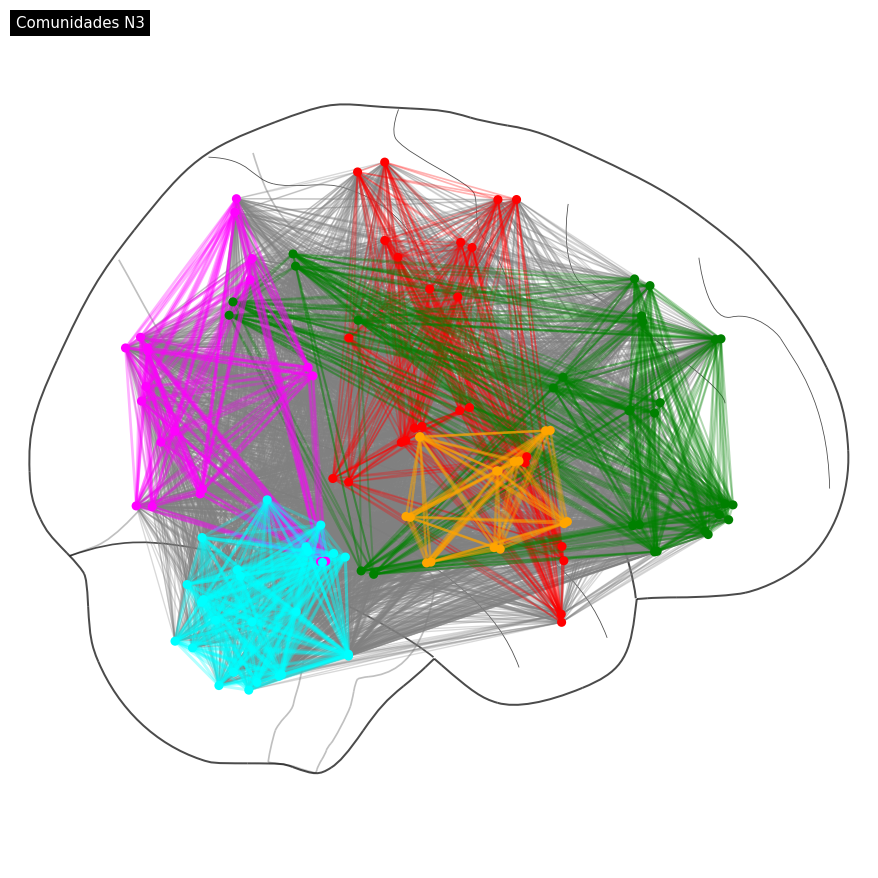

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red", "blue", "green", "orange","yellow","magenta","cyan"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in partition_N3.items()]
figN3 = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(partition_N3), coordinates,
                         title='Comunidades N3',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 6,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figN3);